<a href="https://colab.research.google.com/github/srichardson147/report-assignment-/blob/main/skieon_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
uploaded = files.upload()


Saving loans_dataset.csv to loans_dataset (1).csv


In [17]:
import pandas as pd

df = pd.read_csv('loans_dataset (1).csv')

# 2) Keep only the variables you listed
cols_to_keep = [
    "interest_rate",
    "verified_income",
    "debt_to_income",
    "total_credit_utilized",
    "total_credit_limit",
    "public_record_bankrupt",
    "loan_purpose",
    "term",
    "inquiries_last_12m",
    "issue_month",
    "annual_income",
    "loan_amount",
    "grade",
    "emp_length",
    "homeownership"
]

df_filtered = df[cols_to_keep].copy()

In [20]:

df_filtered = df_filtered.rename(columns={"inquiries_last_12m": "credit_checks"})


In [25]:
n_after = df_filtered.shape[0]

In [27]:
sumarry_stats = df_filtered.describe(include="all")

In [ ]:
df_filtered.to_csv()

In [28]:
df_filtered.to_csv("loans_dataset_filtered.csv", index=False)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/drive/MyDrive/loans_dataset.csv')

In [7]:
df_plot = df[[
    "interest_rate",
    "annual_income",
    "debt_to_income",
    "loan_amount",
    "grade",
    "verified_income",
    "homeownership"
]]

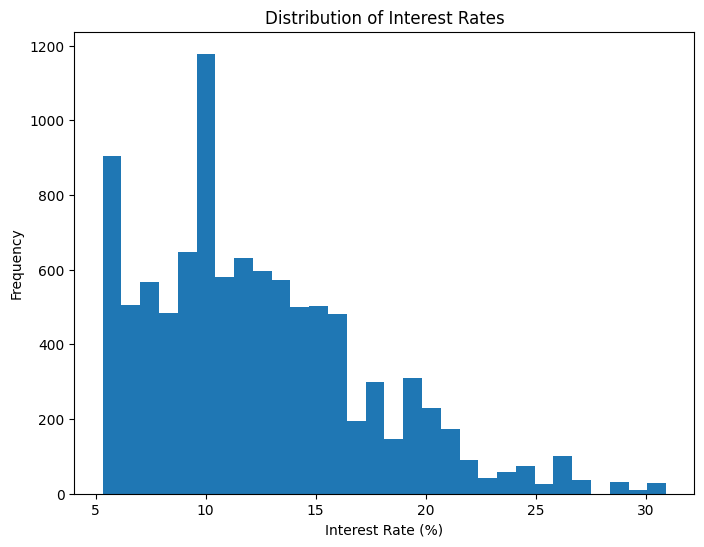

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(df_plot["interest_rate"].dropna(), bins=30)
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Interest Rates")
plt.show()

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/loans_dataset.csv')

df_plot = df[[
    "interest_rate",
    "annual_income",
    "debt_to_income",
    "loan_amount",
    "grade",
    "verified_income",
    "homeownership"
]]

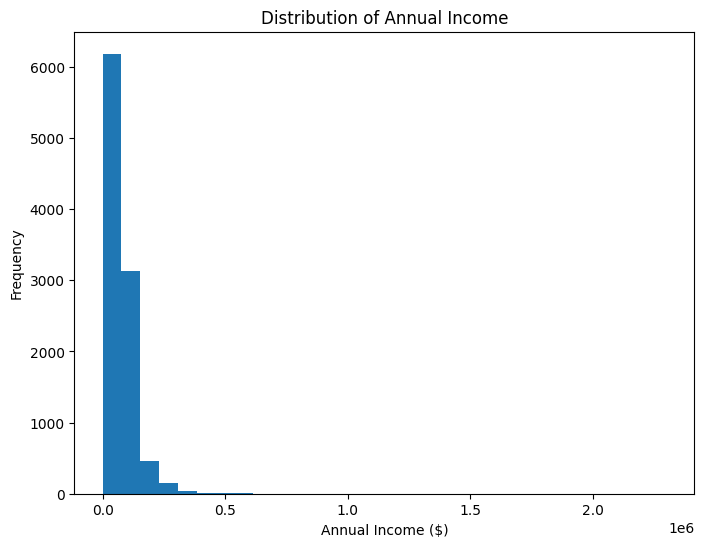

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df_plot["annual_income"].dropna(), bins=30)
plt.xlabel("Annual Income ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")
plt.show()

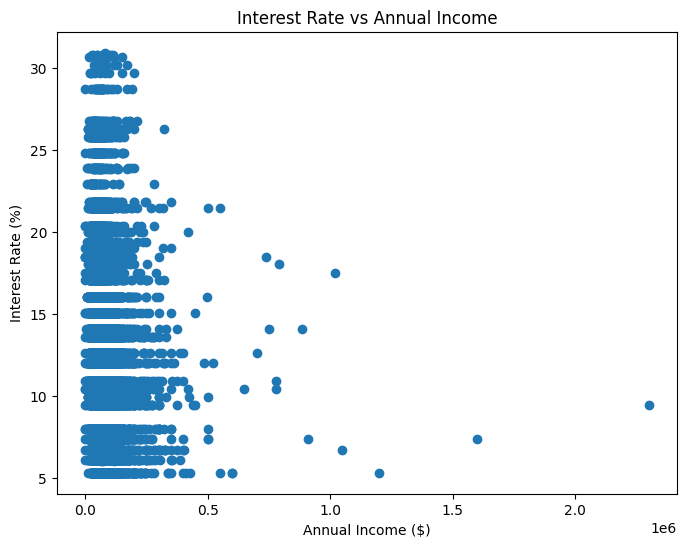

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df_plot["annual_income"], df_plot["interest_rate"])
plt.xlabel("Annual Income ($)")
plt.ylabel("Interest Rate (%)")
plt.title("Interest Rate vs Annual Income")
plt.show()

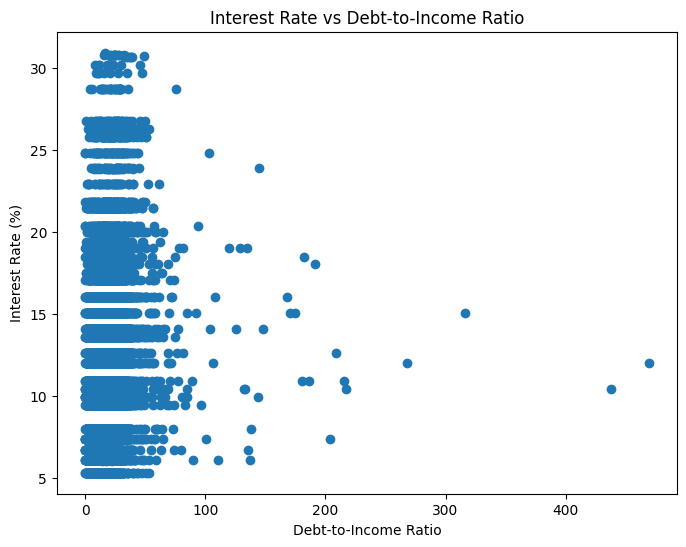

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df_plot["debt_to_income"], df_plot["interest_rate"])
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Interest Rate (%)")
plt.title("Interest Rate vs Debt-to-Income Ratio")
plt.show()

<Figure size 800x600 with 0 Axes>

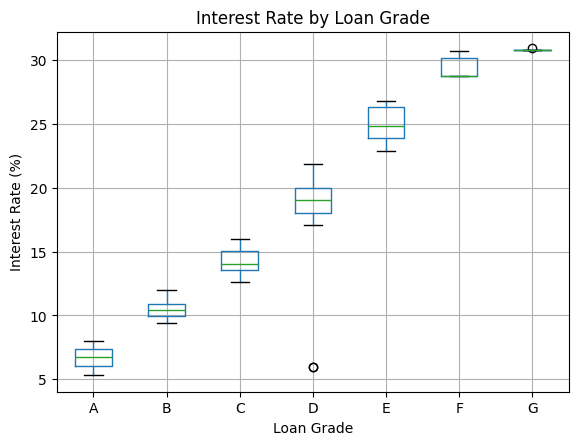

In [8]:
plt.figure(figsize=(8, 6))
df_plot.boxplot(column="interest_rate", by="grade")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.title("Interest Rate by Loan Grade")
plt.suptitle("")  # removes the automatic "Boxplot grouped by grade"
plt.show()

<Figure size 800x600 with 0 Axes>

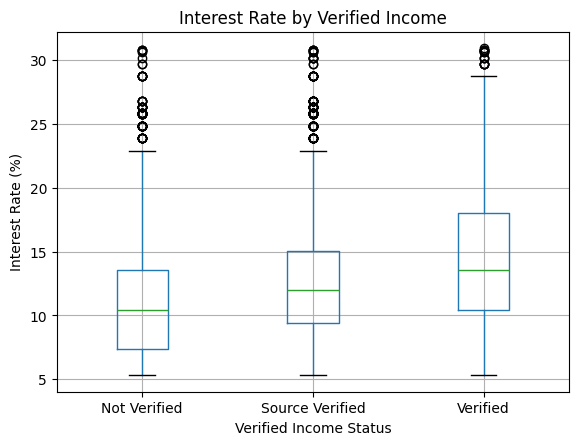

In [9]:
plt.figure(figsize=(8, 6))
df_plot.boxplot(column="interest_rate", by="verified_income")
plt.xlabel("Verified Income Status")
plt.ylabel("Interest Rate (%)")
plt.title("Interest Rate by Verified Income")
plt.suptitle("")
plt.show()


<Figure size 800x600 with 0 Axes>

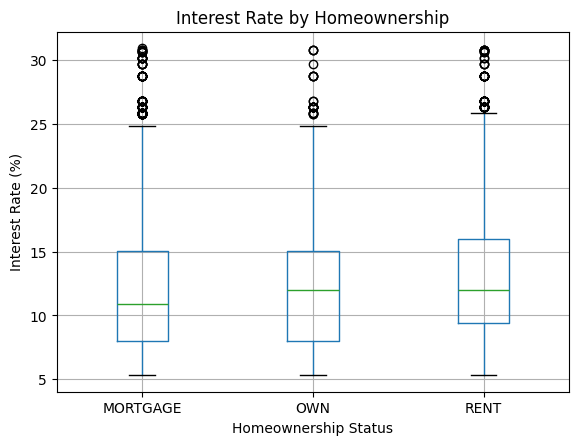

In [10]:
plt.figure(figsize=(8, 6))
df_plot.boxplot(column="interest_rate", by="homeownership")
plt.xlabel("Homeownership Status")
plt.ylabel("Interest Rate (%)")
plt.title("Interest Rate by Homeownership")
plt.suptitle("")
plt.show()

In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/loans_dataset.csv')

In [6]:
df["credit_util"] = df["total_credit_utilized"] / df["total_credit_limit"]
df.loc[df["total_credit_limit"] == 0, "credit_util"] = 0

In [7]:
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)


In [8]:
credit_util_mean = df["credit_util"].mean()
bankruptcy_mean = df["bankruptcy_dummy"].mean()


In [9]:
credit_util_nonzero = (df["credit_util"] > 0).mean()
bankruptcy_nonzero = (df["bankruptcy_dummy"] > 0).mean()

In [10]:
print("Credit Utilization Mean:", credit_util_mean)
print("Credit Utilization Non-zero Proportion:", credit_util_nonzero)
print("Bankruptcy Dummy Mean:", bankruptcy_mean)
print("Bankruptcy Dummy Non-zero Proportion:", bankruptcy_nonzero)








Credit Utilization Mean: 0.40307696513838126
Credit Utilization Non-zero Proportion: 0.9972
Bankruptcy Dummy Mean: 0.1215
Bankruptcy Dummy Non-zero Proportion: 0.1215


In [11]:
import pandas as pd
import statsmodels.api as sm


In [12]:
df = pd.read_csv('/content/drive/MyDrive/loans_dataset.csv')

In [13]:
df_reg = df[["interest_rate", "debt_to_income"]].dropna()

In [14]:
y = df_reg["interest_rate"]
X = sm.add_constant(df_reg["debt_to_income"])

In [15]:
model1 = sm.OLS(y, X).fit()

In [16]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           7.05e-46
Time:                        20:50:03   Log-Likelihood:                -30105.
No. Observations:                9976   AIC:                         6.021e+04
Df Residuals:                    9974   BIC:                         6.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5114      0.081    142.

In [17]:
b0 = model1.params["const"]
b1 = model1.params["debt_to_income"]

In [18]:
print(f"\nEstimated equation: interest_rate = {b0:.4f} + {b1:.4f} * debt_to_income")



Estimated equation: interest_rate = 11.5114 + 0.0472 * debt_to_income


In [19]:
p_value = model1.pvalues["debt_to_income"]
print(f"\nP-value for β1 (debt_to_income): {p_value:.6g}")


P-value for β1 (debt_to_income): 7.05379e-46


In [20]:
for alpha in [0.01, 0.05, 0.10]:
    decision = "Reject H0" if p_value < alpha else "Fail to reject H0"
    print(f"At alpha = {alpha:.2f}: {decision}")








At alpha = 0.01: Reject H0
At alpha = 0.05: Reject H0
At alpha = 0.10: Reject H0


In [21]:
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)


In [22]:
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)


In [24]:
# Create a DataFrame for the regression with bankruptcy_dummy
df_reg_bankruptcy = df[["interest_rate", "bankruptcy_dummy"]].dropna()

y = df_reg_bankruptcy["interest_rate"]
X = sm.add_constant(df_reg_bankruptcy["bankruptcy_dummy"])


In [25]:
model2 = sm.OLS(y, X).fit()

In [26]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.22
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           1.47e-06
Time:                        21:31:05   Log-Likelihood:                -30274.
No. Observations:               10000   AIC:                         6.055e+04
Df Residuals:                    9998   BIC:                         6.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.3380      0.053  

In [27]:
dummies = pd.get_dummies(df["verified_income"], drop_first=True).astype(int)


In [28]:
df_reg = pd.concat([df["interest_rate"], dummies], axis=1).dropna()


In [29]:
y = df_reg["interest_rate"]
X = sm.add_constant(df_reg.drop(columns=["interest_rate"]))

In [30]:
model3 = sm.OLS(y, X).fit()

In [31]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     315.9
Date:                Wed, 14 Jan 2026   Prob (F-statistic):          8.92e-134
Time:                        22:16:53   Log-Likelihood:                -29979.
No. Observations:               10000   AIC:                         5.996e+04
Df Residuals:                    9997   BIC:                         5.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.0995      0.081    1

In [32]:
avg_not_verified = df.loc[
    df["verified_income"] == "Not Verified", "interest_rate"
].mean()

print("Average interest rate (Not Verified):", avg_not_verified)

Average interest rate (Not Verified): 11.099457429048414


In [33]:
df["credit_util"] = df["total_credit_utilized"] / df["total_credit_limit"]
df.loc[df["total_credit_limit"] == 0, "credit_util"] = 0


In [34]:
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)


In [35]:
df_reg = df[
    ["interest_rate", "debt_to_income", "credit_util", "bankruptcy_dummy"]
].dropna()

In [37]:
y = df_reg["interest_rate"]
X = sm.add_constant(
    df_reg[["debt_to_income", "credit_util", "bankruptcy_dummy"]]
)

In [38]:
model4 = sm.OLS(y, X).fit()

In [39]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     279.9
Date:                Wed, 14 Jan 2026   Prob (F-statistic):          1.85e-174
Time:                        23:50:37   Log-Likelihood:                -29803.
No. Observations:                9976   AIC:                         5.961e+04
Df Residuals:                    9972   BIC:                         5.964e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.8708      0.102  

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/loans_dataset.csv')

df['credit_util'] = df['total_credit_utilized'] / df['total_credit_limit']
df.loc[df['total_credit_limit'] == 0, 'credit_util'] = 0
df['bankruptcy_dummy'] = (df['public_record_bankrupt'] >= 1).astype(int)
df['credit_checks'] = df['inquiries_last_12m']

In [3]:
df["term_60"] = (df["term"] == 60).astype(int)

In [4]:
grade_dummies = pd.get_dummies(df["grade"], prefix="grade", drop_first=True).astype(int)
home_dummies = pd.get_dummies(df["homeownership"], prefix="home", drop_first=True).astype(int)
purpose_dummies = pd.get_dummies(df["loan_purpose"], prefix="purpose", drop_first=True).astype(int)

In [5]:
X = pd.concat([
    df[[
        "debt_to_income",
        "credit_util",
        "bankruptcy_dummy",
        "annual_income",
        "loan_amount",
        "emp_length",
        "credit_checks",
        "term_60"
    ]],
    grade_dummies,
    home_dummies,
    purpose_dummies
], axis=1)

y = df["interest_rate"]

In [7]:
import statsmodels.api as sm
df_reg = pd.concat([y, X], axis=1).dropna()
y_reg = df_reg["interest_rate"]
X_reg = sm.add_constant(df_reg.drop(columns="interest_rate"))

In [8]:
model5 = sm.OLS(y_reg, X_reg).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     6723.
Date:                Thu, 15 Jan 2026   Prob (F-statistic):               0.00
Time:                        04:39:36   Log-Likelihood:                -13874.
No. Observations:                9182   AIC:                         2.780e+04
Df Residuals:                    9154   BIC:                         2.800e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [9]:
residuals_first5 = model5.resid.head()
print(residuals_first5)

0   -0.270227
1   -1.422690
2   -2.083993
3    0.022217
4   -0.342447
dtype: float64


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [2]:
def stars(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

In [3]:
def fmt_coef_se(model, var):
    """
    Return "coef***\n(se)" for a variable if present in model, else "".
    """
    if var in model.params.index:
        c = model.params[var]
        se = model.bse[var]
        p = model.pvalues[var]
        return f"{c:.4f}{stars(p)}\n({se:.4f})"
    return ""

def build_model_col(model, all_vars, model_name):
    col = pd.Series({v: fmt_coef_se(model, v) for v in all_vars}, name=model_name)
    return col


In [4]:
df = pd.read_csv('/content/drive/MyDrive/loans_dataset.csv')


In [5]:
df["credit_util"] = df["total_credit_utilized"] / df["total_credit_limit"]
df.loc[df["total_credit_limit"] == 0, "credit_util"] = 0

df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)


In [6]:
df["credit_checks"] = df["inquiries_last_12m"]


In [7]:
df["term_60"] = (df["term"] == 60).astype(int)

In [8]:
m1_df = df[["interest_rate", "debt_to_income"]].dropna()
y1 = m1_df["interest_rate"]
X1 = sm.add_constant(m1_df["debt_to_income"])
model1 = sm.OLS(y1, X1).fit()


In [9]:
m2_df = df[["interest_rate", "bankruptcy_dummy"]].dropna()
y2 = m2_df["interest_rate"]
X2 = sm.add_constant(m2_df["bankruptcy_dummy"])
model2 = sm.OLS(y2, X2).fit()

In [10]:
m3_df = df[["interest_rate", "verified_income"]].dropna()
vi_dum = pd.get_dummies(m3_df["verified_income"], drop_first=True).astype(int)  # ref: Not Verified
X3 = sm.add_constant(vi_dum)
y3 = m3_df["interest_rate"]
model3 = sm.OLS(y3, X3).fit()

In [11]:
m4_df = df[["interest_rate", "debt_to_income", "credit_util", "bankruptcy_dummy"]].dropna()
y4 = m4_df["interest_rate"]
X4 = sm.add_constant(m4_df[["debt_to_income", "credit_util", "bankruptcy_dummy"]])
model4 = sm.OLS(y4, X4).fit()

In [12]:
m5_cols = [
    "interest_rate",
    "debt_to_income",
    "credit_util",
    "bankruptcy_dummy",
    "annual_income",
    "loan_amount",
    "emp_length",
    "credit_checks",
    "term_60",
    "grade",
    "homeownership",
    "loan_purpose",
]

m5_df = df[m5_cols].dropna()

grade_d = pd.get_dummies(m5_df["grade"], prefix="grade", drop_first=True).astype(int)
home_d  = pd.get_dummies(m5_df["homeownership"], prefix="home", drop_first=True).astype(int)
purp_d  = pd.get_dummies(m5_df["loan_purpose"], prefix="purpose", drop_first=True).astype(int)


X5 = pd.concat([
    m5_df[[
        "debt_to_income",
        "credit_util",
        "bankruptcy_dummy",
        "annual_income",
        "loan_amount",
        "emp_length",
        "credit_checks",
        "term_60"
    ]],
    grade_d,
    home_d,
    purp_d
], axis=1)


y5 = m5_df["interest_rate"]
X5 = sm.add_constant(X5)
model5 = sm.OLS(y5, X5).fit()




In [14]:
models = {
    "Model 1": model1,
    "Model 2": model2,
    "Model 3": model3,
    "Model 4": model4,
    "Model 5": model5
}

In [15]:
all_vars = sorted(set().union(*[m.params.index for m in models.values()]))

In [16]:
if "const" in all_vars:
    all_vars.remove("const")
    all_vars = ["const"] + all_vars

In [18]:
coef_table = pd.concat(
    [build_model_col(m, all_vars, name) for name, m in models.items()],
    axis=1
)

In [20]:
gof = pd.DataFrame(index=["R2", "N", "F-statistic"], columns=coef_table.columns)
for name, m in models.items():
    gof.loc["R2", name] = f"{m.rsquared:.3f}"
    gof.loc["N", name] = f"{int(m.nobs)}"
    gof.loc["F-statistic", name] = f"{m.fvalue:.1f}"

results_table = pd.concat([coef_table, gof], axis=0)

In [21]:
print(results_table)

                                         Model 1               Model 2  \
const                       11.5114***\n(0.0807)  12.3380***\n(0.0533)   
Source Verified                                                          
Verified                                                                 
annual_income                                                            
bankruptcy_dummy                                   0.7368***\n(0.1529)   
credit_checks                                                            
credit_util                                                              
debt_to_income               0.0472***\n(0.0033)                         
emp_length                                                               
grade_B                                                                  
grade_C                                                                  
grade_D                                                                  
grade_E                               

In [24]:
results_table.to_csv("regression_table_models_1_to_5.csv")
print("\nSaved: regression_table_models_1_to_5.csv")


Saved: regression_table_models_1_to_5.csv
